## Using pyDPI to gain all related intrinsic properties of organic photovoltaic materials from calculation 

* that include 
    * Molecular mass 
    * Log P - ***Mordred***
    * Ring count - ***Mordred***
    * Hydrogen bond acceptor count - ***Mordred***
    * Hydrogen bond donor count - ***Mordred***
    * Rotatable bond count - ***Mordred***
    * Molecular polarizability
    * Refractivity - ***Not Correct***
    * Vander Waals surface area 
    * Vander Waals volume 
    * Water accessible area 
    * Electronic localization energy 
    * Partial charge 
    * Electron density 
    * Steric hindrance 
    * σ orbital electronegativity 
    * π orbitalelectronegativity
    
among these 33 molecular descriptors, 20 of them are statistically significant. 

In [1]:
# # time 
# import time
# from time import gmtime, strftime

# python widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# pydpi cdk
import pydpi
from pydpi import test
from pydpi import pydrug

# pybel and openbabel
from openbabel import *
from pybel import *

# mordred descriptor calculator
import mordred
from mordred import Calculator, descriptors

# normal packages
import pandas as pd
import numpy as np
from sompy.sompy import SOMFactory
import sklearn
import sklearn.cluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# pickle is used to dump data 

%matplotlib inline
mpl.get_backend()

CACHEDIR=C:\Users\jtz93\.matplotlib
Using fontManager instance from C:\Users\jtz93\.matplotlib\fontlist-v310.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


'module://ipykernel.pylab.backend_inline'

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
data = pd.read_csv(r"./data/compdata.csv").set_index("ID No.")
names = ["Voc","Jsc","FF","Monomer","Mw", "DP","Bandgap"] #select essential experimental factors
data.head(3)

,Nickname,Ref. No,PCE_max(%),PCE_ave(%),Voc (V),Jsc (mA cm^2),FF,Mw (kg mol^-1),Mn (kg mol^-1),PDI (=Mw/Mn),Monomer (g mol^-1),HOMO,LUMO,Bandgap,SMILES
ID No.,,,,,,,,,,,,,,,
1,PBTTT-C14,S1,2.34,2.34,0.53,9.37,0.48,46.2,22.0,2.10,724,5.1,3.10,1.88,CC1=CC(CCCCCCCCCCCCCC)=C(C2=CC3=C(S2)C=C(C4=C(...
2,PCDTBT,S2,3.60,3.60,0.89,6.92,0.63,73.0,37.0,1.97,731,5.5,3.60,1.88,CC1=CC(N(C(CCCCCCCC)CCCCCCCC)C2=C3C=CC(C4=CC=C...
3,PCPDTBT,S3,5.12,5.12,0.61,15.73,0.53,47.6,26.6,1.79,564,5.3,3.55,1.43,CC1=CC(C(CC(CCCC)CC)(CC(CCCC)CC)C2=C3SC(C4=CC=...


In [3]:
data.columns

Index(['Nickname', 'Ref. No', 'PCE_max(%)', 'PCE_ave(%)', 'Voc (V)',
       'Jsc (mA cm^2)', 'FF', 'Mw (kg mol^-1)', 'Mn (kg mol^-1)',
       'PDI (=Mw/Mn)', 'Monomer (g mol^-1)', 'HOMO', 'LUMO', 'Bandgap',
       'SMILES'],
      dtype='object')

## Calculating molecular constitutional descriptors

In [4]:
from pydpi.drug import constitution
from pydpi.drug import topology
from pydpi.drug import connectivity
from pydpi.drug import molproperty
from pydpi.drug import kappa
from pydpi.drug import charge
from pydpi.drug import fingerprint
from pydpi.pydrug import Chem
from pydpi.drug import getmol

In [5]:
# mordred has 2D and 3D descriptors, depending on what kind you want
from mordred import Calculator, descriptors
n_all = len(Calculator(descriptors,ignore_3D = False).descriptors)
n_2D = len(Calculator(descriptors,ignore_3D = True).descriptors)
print("2D:     {:5}\n3D:     {:5}\n-------------\ntotal{:5}".format(n_2D,n_all - n_2D, n_all))

2D:      1613
3D:       212
-------------
total 1825


In [22]:
from pydpi import pydrug as drug
from pydpi.pydrug import Chem
from pydpi.pydrug import AllChem
from pydpi.pydrug import AllProps
from pydpi.pydrug import topology
from pydpi.pydrug import connectivity
from pydpi.pydrug import constitution
from pydpi.pydrug import kappa
from pydpi.pydrug import basak
from pydpi.pydrug import bcut
from pydpi.pydrug import charge
from pydpi.pydrug import estate
from pydpi.pydrug import fingerprint
from pydpi.pydrug import FingerprintName
from pydpi.pydrug import molproperty
from pydpi.pydrug import getmol
from pydpi.pydrug import geary
from pydpi.pydrug import moe
from pydpi.pydrug import moran,moreaubroto,string

from pydpi.pydrug import *

In [7]:
from pychem.pychem import pybel
mol = pybel.readstring("smi", "CCCC") #install pybel by installing openbabel
mol.write("inchi")

'InChI=1S/C4H10/c1-3-4-2/h3-4H2,1-2H3\n'

In [8]:
from __future__ import print_function 
import os
import time
import re
import multiprocessing as mp

In [34]:
smis = [
    "CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=CC=C(C3=CC(CC(CCCCCCCC)CCCCCCCCCC)=C(C4=CC(F)=C(C5=C(F)C=C(C)S5)S4)S3)C6=NSN=C62)S1",
    "CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=C(F)C(F)=C(C3=CC(CC(CCCCCCCCCC)CCCCCCCC)=C(C4=CC=C(C5=CC=C(C)S5)S4)S3)C6=NSN=C62)S1",
    "CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=C(F)C(F)=C(C3=CC(CC(CCCCCCCCCC)CCCCCCCC)=C(C4=CC=C(C5=CC=C(C)S5)S4)S3)C6=NSN=C62)S1",
    "CC(O1)=CC2=C1C(OCC(CCCC)CC)=C(C=C(C3=CC=C(C4=CC=C(C5=CC=C(C)S5)C6=NN(CCCCCCCC)N=C64)S3)O7)C7=C2OCC(CCCC)CC",
    "CC(S1)=CC2=C1C(OCC(CCCC)CC)=C(C=C(C3=CC=C(C4=CC=C(C5=CC=C(C)S5)C6=NN(CCCCCCCC)N=C64)S3)S7)C7=C2OCC(CCCC)CC",
    "CC1=C(F)C=C(C2=C(CC(CC)CCCC)C=C(C3=C4C(C(C5=C(CC(CCCC)CC)SC(CC(CC)CCCC)=C5C4=O)=O)=C(C6=CC(CC(CCCC)CC)=C(C7=CC(F)=C(C)S7)S6)S3)S2)S1"
]

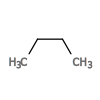

In [10]:
mol

In [11]:
mol = Chem.MolFromSmiles("CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=CC=C(C3=CC(CC(CCCCCCCC)CCCCCCCCCC)=C(C4=CC(F)=C(C5=C(F)C=C(C)S5)S4)S3)C6=NSN=C62)S1")
print(connectivity.CalculateChi2(mol))
print(connectivity.CalculateChi3c(mol))
res = connectivity.GetConnectivity(mol)
print(res)

29.721713171790636
3.189942883994237
{'Chi0': 51.626, 'Chi1': 35.735, 'mChi1': 0.458, 'Chi2': 29.722, 'Chi3': 24.091, 'Chi4': 20.183, 'Chi5': 15.649, 'Chi6': 12.363, 'Chi7': 9.755, 'Chi8': 7.657, 'Chi9': 5.95, 'Chi10': 4.566, 'Chi3c': 3.19, 'Chi4c': 0.0, 'Chi4pc': 7.85, 'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.503, 'Chi6ch': 0.056, 'knotp': 4.66, 'Chiv0': 50.435, 'Chiv1': 33.775, 'Chiv2': 27.027, 'Chiv3': 20.929, 'Chiv4': 16.259, 'Chiv5': 12.025, 'Chiv6': 9.114, 'Chiv7': 6.758, 'Chiv8': 5.022, 'Chiv9': 3.752, 'Chiv10': 2.693, 'dchi0': 1.192, 'dchi1': 1.961, 'dchi2': 2.695, 'dchi3': 3.162, 'dchi4': 3.923, 'Chiv3c': 2.627, 'Chiv4c': 0.0, 'Chiv4pc': 6.129, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.415, 'Chiv6ch': 0.021, 'knotpv': 3.503}


### Categories of Descriptors
for these 33 descriptors mentioned above, 20 of them are useful regarding the effectiveness on predicting Jsc, Voc and such. we need to find out what category these descriptors belong to

In [24]:
res_mol = molproperty.GetMolecularProperty(mol)
res_top = topology.GetTopology(mol)
res_const = constitution.GetConstitutional(mol)
res_connec = connectivity.GetConnectivity(mol)
res_kappa = kappa.GetKappa(mol)
res_charge = charge.GetCharge(mol)

# from pydpi.pydrug import PyDrug
# drug = PyDrug()
# mol = drug.ReadMolFromSmile("CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=CC=C(C3=CC(CC(CCCCCCCC)CCCCCCCCCC)=C(C4=CC(F)=C(C5=C(F)C=C(C)S5)S4)S3)C6=NSN=C62)S1")
# res_all = drug.GetAllDescriptor()

In [50]:
def readsome(smis):
    ls = []
    for smi in smis:
        mol = Chem.MolFromSmiles(smi)
        res_mol = molproperty.GetMolecularProperty(mol)
        res_top = topology.GetTopology(mol)
        res_const = constitution.GetConstitutional(mol)
        res_connec = connectivity.GetConnectivity(mol)
        res_kappa = kappa.GetKappa(mol)
        res_charge = charge.GetCharge(mol)
        ls.append(res_mol)
    
    return ls

In [52]:
for i in readsome(smis):
    print(i)

{'LogP': 24.381, 'LogP2': 594.411, 'MR': 324.885, 'TPSA': 25.78, 'Hy': -5.427, 'UI': 4.954}
{'LogP': 24.381, 'LogP2': 594.411, 'MR': 324.885, 'TPSA': 25.78, 'Hy': -5.427, 'UI': 4.954}
{'LogP': 24.381, 'LogP2': 594.411, 'MR': 324.885, 'TPSA': 25.78, 'Hy': -5.427, 'UI': 4.954}
{'LogP': 16.215, 'LogP2': 262.94, 'MR': 249.586, 'TPSA': 75.45, 'Hy': -4.985, 'UI': 5.129}
{'LogP': 17.152, 'LogP2': 294.206, 'MR': 260.808, 'TPSA': 49.17, 'Hy': -4.985, 'UI': 5.129}
{'LogP': 21.43, 'LogP2': 459.229, 'MR': 306.185, 'TPSA': 34.14, 'Hy': -5.254, 'UI': 5.044}


In [26]:
SMILES = data.SMILES

# Mordred Descriptors 


In [4]:
from rdkit import Chem
from mordred import Calculator,descriptors

In [18]:
# create descriptor calculator with all descriptors
calc = Calculator(descriptors,ignore_3D=True,version="1.0.0")

In [19]:
len(calc.descriptors) # number of descriptors available
# 1824+1612
# 3436 

1612

In [20]:
# calculate single molecule
mol = Chem.MolFromSmiles('c1ccccc1')
prop = calc(mol)[6]
calc(mol)
# prop

<rdkit.Chem.rdchem.Mol object at 0x000001D2190AA990>('Result',[4.242640687119286, 3.9999999999999996, 0, 0, 7.9999999999999964, 1.9999999999999998, 3.999999999999999, 7.9999999999999964, 1.3333333333333328, 2.6876239260352994, 0, 2.449489742783178, 0.40824829046386296, 0.38505411084803687, 14.696938456699067, 2.449489742783178, 2.1768135800760917, 6, 6, 12, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54.0, 54.0, 54.0, 27.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 36.0, 48.0, 42.0, 18.0, 3.0, 0.0, 0.0, 0.0, 30.0, 36.0, 48.0, 42.0, 18.0, 3.0, 0.0, 0.0, 0.0, 222.0, 252.0, 288.0, 186.0, 42.0, 3.0, 0.0, 0.0, 0.0, 871.68111, 938.2272539999998, 1010.8697819999998, 584.1738029999999, 78.73891199999998, 3.0481920000000002, 0.0, 0.0, 0.0, 2727.6038770815603, 3229.52110871909, 3917.9408069422016, 2833.8925682797944, 874.9221648086933, 93.25123329279079, 0.0, 0.0, 0.0, 85.55387999999999, 87.94888799999998, 130.65468, 148.34391599999998, 83.01657599999999, 20.155392, 0.0, 0.0, 0.0, 68.055, 72.675, 106.3350

In [24]:
# for all 2D descriptors
smi = 'c1ccccc1'
mol = Chem.MolFromSmiles('c1ccccc1')
prop_value = pd.DataFrame(calc(mol)[0:]).T #calculated descriptors transposed
pd.Series(calc(mol))
ls = (str(calc(mol)).split(","))
ls

["Result({'ABC': 4.242640687119286",
 " 'ABCGG': 3.9999999999999996",
 " 'nAcid': 0",
 " 'nBase': 0",
 " 'SpAbs_A': 7.9999999999999964",
 " 'SpMax_A': 1.9999999999999998",
 " 'SpDiam_A': 3.999999999999999",
 " 'SpAD_A': 7.9999999999999964",
 " 'SpMAD_A': 1.3333333333333328",
 " 'LogEE_A': 2.6876239260352994",
 " 'SM1_A': 0",
 " 'VE1_A': 2.449489742783178",
 " 'VE2_A': 0.40824829046386296",
 " 'VE3_A': 0.38505411084803687",
 " 'VR1_A': 14.696938456699067",
 " 'VR2_A': 2.449489742783178",
 " 'VR3_A': 2.1768135800760917",
 " 'nAromAtom': 6",
 " 'nAromBond': 6",
 " 'nAtom': 12",
 " 'nHeavyAtom': 6",
 " 'nSpiro': 0",
 " 'nBridgehead': 0",
 " 'nH': 6",
 " 'nB': 0",
 " 'nC': 6",
 " 'nN': 0",
 " 'nO': 0",
 " 'nS': 0",
 " 'nP': 0",
 " 'nF': 0",
 " 'nCl': 0",
 " 'nBr': 0",
 " 'nI': 0",
 " 'nX': 0",
 " 'ATS0dv': 54.0",
 " 'ATS1dv': 54.0",
 " 'ATS2dv': 54.0",
 " 'ATS3dv': 27.0",
 " 'ATS4dv': 0.0",
 " 'ATS5dv': 0.0",
 " 'ATS6dv': 0.0",
 " 'ATS7dv': 0.0",
 " 'ATS8dv': 0.0",
 " 'ATS0d': 30.0",
 " 'AT

In [5]:
from mordred import Chi, ABCIndex

In [29]:
benzene = Chem.MolFromSmiles('c1ccccc1')

# create descriptor instance
abci = ABCIndex.ABCIndex()
chi_p2 = Chi.Chi(type='path', order=2)

# create product term using descriptor arithmetic
abci_x_chi_p2 = abci * chi_p2

# calculate descriptor value
result = abci_x_chi_p2(benzene)

print(abci_x_chi_p2, result)

(ABC*Xp-2d) 9.000000000000002


In [35]:
smis = [
    "CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=CC=C(C3=CC(CC(CCCCCCCC)CCCCCCCCCC)=C(C4=CC(F)=C(C5=C(F)C=C(C)S5)S4)S3)C6=NSN=C62)S1",
    "CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=C(F)C(F)=C(C3=CC(CC(CCCCCCCCCC)CCCCCCCC)=C(C4=CC=C(C5=CC=C(C)S5)S4)S3)C6=NSN=C62)S1",
    "CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=C(F)C(F)=C(C3=CC(CC(CCCCCCCCCC)CCCCCCCC)=C(C4=CC=C(C5=CC=C(C)S5)S4)S3)C6=NSN=C62)S1",
    "CC(O1)=CC2=C1C(OCC(CCCC)CC)=C(C=C(C3=CC=C(C4=CC=C(C5=CC=C(C)S5)C6=NN(CCCCCCCC)N=C64)S3)O7)C7=C2OCC(CCCC)CC",
    "CC(S1)=CC2=C1C(OCC(CCCC)CC)=C(C=C(C3=CC=C(C4=CC=C(C5=CC=C(C)S5)C6=NN(CCCCCCCC)N=C64)S3)S7)C7=C2OCC(CCCC)CC",
    "CC1=C(F)C=C(C2=C(CC(CC)CCCC)C=C(C3=C4C(C(C5=C(CC(CCCC)CC)SC(CC(CC)CCCC)=C5C4=O)=O)=C(C6=CC(CC(CCCC)CC)=C(C7=CC(F)=C(C)S7)S6)S3)S2)S1"
]

### Returns a Dataframe with all descriptors

In [6]:
data = pd.read_csv(r"./data/compdata.csv").set_index("ID No.")
names = ["Voc","Jsc","FF","Monomer","Mw", "DP","Bandgap"] #select essential experimental factors
data.head(3)

,Nickname,Ref. No,PCE_max(%),PCE_ave(%),Voc (V),Jsc (mA cm^2),FF,Mw (kg mol^-1),Mn (kg mol^-1),PDI (=Mw/Mn),Monomer (g mol^-1),HOMO,LUMO,Bandgap,SMILES
ID No.,,,,,,,,,,,,,,,
1,PBTTT-C14,S1,2.34,2.34,0.53,9.37,0.48,46.2,22.0,2.10,724,5.1,3.10,1.88,CC1=CC(CCCCCCCCCCCCCC)=C(C2=CC3=C(S2)C=C(C4=C(...
2,PCDTBT,S2,3.60,3.60,0.89,6.92,0.63,73.0,37.0,1.97,731,5.5,3.60,1.88,CC1=CC(N(C(CCCCCCCC)CCCCCCCC)C2=C3C=CC(C4=CC=C...
3,PCPDTBT,S3,5.12,5.12,0.61,15.73,0.53,47.6,26.6,1.79,564,5.3,3.55,1.43,CC1=CC(C(CC(CCCC)CC)(CC(CCCC)CC)C2=C3SC(C4=CC=...


In [8]:
# for multiple mol 
from multiprocessing import freeze_support
from rdkit import Chem
from mordred import Calculator,descriptors

def calc_mol_des(data):

    smis = data.SMILES 
    mols = []
    for smi in smis:
        mols.append(Chem.MolFromSmiles(smi))
        
    calc = Calculator(descriptors,ignore_3D=False)
    
    return calc.pandas(mols)

In [9]:
descriptors = calc_mol_des(data)

C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1203/1203 [10:24<00:00,  1.92it/s]


In [11]:
descriptors.to_csv("./data/opv_descriptors_3D.csv")

In [12]:
# loading descriptors
des = pd.read_csv("./data/opv_descriptors_3D.csv")
des.head(3)

C:\Users\jtz93\Anaconda3\envs\SOMenv\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,54,55,56,57,58,59,60,61,62,153,154,155,156,157,158,159,160,161,261,262,263,264,265,266,267,268,269,369,370,371,372,373,374,375,376,377,474,475,476,477,478,479,480,481,570,571,572,573,574,575,576,577,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,859,867,875,883,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,1102,1181,1250,1251,1252,1253

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,36.079025,23.746274,0,0,61.54632973873565,2.5182638091421174,4.771130724433434,61.54632973873566,1.2822152028903262,...,10.381676,103.014856,724.420386,6.245003,13057,60,230.0,259.0,13.61111111111111,11.222222
1,1,40.038585,28.518904,0,0,67.60715732153177,2.574862212494231,4.98622613566145,67.60715732153177,1.3256305357163092,...,10.879461,107.444100,731.340162,7.032117,11217,82,272.0,326.0,13.527777777777779,11.416667
2,2,29.510964,24.332422,0,0,49.55279337433869,2.666105595324362,5.096396244894365,49.55279337433869,1.3040208782720708,...,10.749463,93.594354,564.266662,6.881301,4235,66,206.0,253.0,12.145833333333332,8.611111
